In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [81]:
def f(l,x,n):
    if n==1:
        return l*x*(1-x)
    elif n==0:
        return x
    else:
        return f(l,l*x*(1-x),n-1)

def fder1(l,x):
    return l*(1-2*x)
    
def fder(l,x,n):
    result = 1
    for i in range(n):
        result *= fder1(l,f(l,x,i))
    return result
    
def fzer(l,x,n):
    return f(l,x,n)-x
    
def fzerder(l,x,n):
    return fder(l,x,n)-1

In [117]:
def newton(g,gder,x0,l,n):
    #da ottimizzare
    i=0
    try:
        while abs(g(l,x0,n)) > 1e-6 and i<=1000:
            xn = x0 - (g(l,x0,n)/gder(l,x0,n))
            x0 = xn
            i+=1
        if(i>1000):
            return 'err'
        return x0
    except:
        return 'err'

In [83]:
N = 1000
#N = int(input("Numero lambda [1000]: "))
lmax = 4
ls = np.linspace(0,lmax,N)
x0 = 0.1

In [84]:
def delete_duplicates(vect,margin):
    result = [vect[0]]
    #O(n^2) -> da sistemare assolutamente
    for v in vect:
        accept = 1
        for r in result:
            if abs(v-r) < margin:
                accept = 0
        if accept == 1:
            result.append(v)
    return result

In [161]:
def change_situation(l,n,start):
    for i in range(10):
        l = l+lmax/N
        zer = []
        for s in start:
            zer.append(newton(fzer,fzerder,s,l,n))
            if(zer[-1] == 'err'):
                zer.pop(-1)
        zer = delete_duplicates(list(set(zer)),1e-3)
        for y in zer:
            #print("n={0} x={1} fnder(x)={2}".format(n,y,fder(l,y,n)))
            if(abs(fder(l,y,n))<1):
                return 0
        start = zer
    return 1

2
4
8
16
32


/var/folders/_c/53p2ylxx1kvdwvv_9gnhx2c40000gn/T/ipykernel_25565/3731332170.py:3: RuntimeWarning: overflow encountered in double_scalars
  return l*x*(1-x)
/var/folders/_c/53p2ylxx1kvdwvv_9gnhx2c40000gn/T/ipykernel_25565/3731332170.py:15: RuntimeWarning: overflow encountered in double_scalars
  result *= fder1(l,f(l,x,i))
/var/folders/_c/53p2ylxx1kvdwvv_9gnhx2c40000gn/T/ipykernel_25565/156752926.py:6: RuntimeWarning: invalid value encountered in double_scalars
  xn = x0 - (g(l,x0,n)/gder(l,x0,n))
/var/folders/_c/53p2ylxx1kvdwvv_9gnhx2c40000gn/T/ipykernel_25565/3731332170.py:7: RuntimeWarning: overflow encountered in double_scalars
  return f(l,l*x*(1-x),n-1)


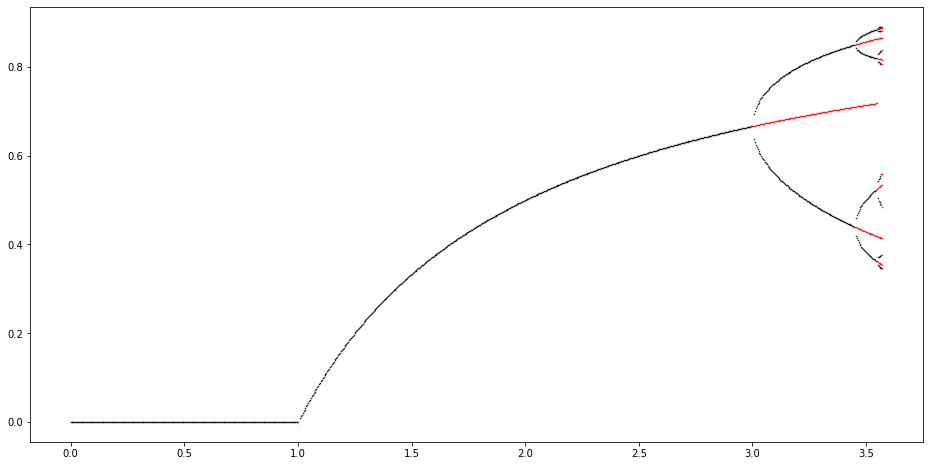

In [165]:
#SENZA HINT
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
n = 1
exzeros = [0]
for l in ls:
    zer = []
    for start in exzeros:
        #print("Newton")
        zer.append(newton(fzer,fzerder,start,l,n))
        #print(zer[-1])
        if(zer[-1] == 'err'):
            zer.pop(-1)
    #print(str(n) + " fuori da Newton")
    #list-set non mi cancella i numeri molto vicini, capire come cancellare duplicati vicini in modo ottimale
    zer = delete_duplicates(list(set(zer)),1e-3)

    count_stab = 0

    temp = 1
    #print("rientro")
    for y in zer:
        if (l>1 and abs(y) > 1e-6) or l<=(1+lmax/N):
            #print("#{3} Test derivata con l={0} e x={1} e n={2} con lunghezza zer={4}".format(l,y,n,temp,len(zer)))
            temp+=1
            if(abs(fder(l,y,n)) < 1):
                count_stab += 1
                ax.plot([l], [y], marker=".", color='k', markersize=1)
            else:
                ax.plot([l], [y], marker=".", color='r', markersize=1)
    exzeros = []
    if (count_stab == 0 and l>(1+lmax/N)):
    #nei pressi di una biforcazione errore numerico pensa che non ci siano stabili e raddoppia n, poi per il
    #successivo fa lo stesso e va avanti così finché non esplode
    #change_situation vede se l'insabilità c'è per i prossimi 10 punti
        if(change_situation(l,n,zer)):
            #print(zer)
            for z in zer:
                #vorrei fare 0.5,0.05,0.005
                k=5/10**math.log(n,2)
                exzeros.append(max([min([z+k,1]),0]))
                exzeros.append(max([min([z-k,1]),0]))
            n = 2*n
            print(n)
    exzeros.extend(zer)
    #filtered = []
    #filtered = [ele for ele in exzeros if ele >= 0 and ele <=1]
    #exzeros = filtered
    if n==32:
        break

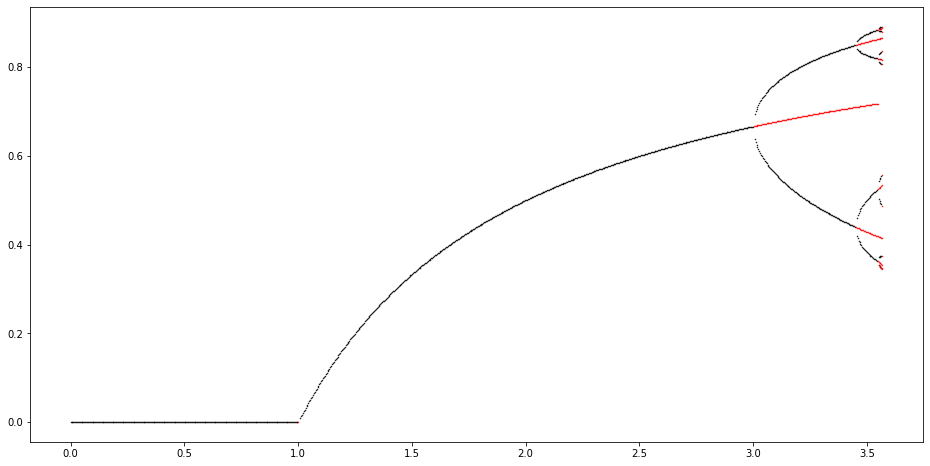

In [164]:
#CON HINT
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
n = 1
exzeros = 0
instables = []
for l in ls:    
    zer = []
    zer.append(newton(fzer,fzerder,exzeros,l,n))
    if(zer[-1] == 'err'):
            print(l)
            print(exzeros)
            zer.pop(-1)
    if n>2:
        #do n/2 colpi di dinamica per coprire l'orbita periodica
        #idea molto interessante essendo sensibilmente più veloce della mia precedente
        for i in range(int(n/2)):
            zer.append(f(l,zer[-1],1))
            
    #zeri degli instabili
    if(len(instables) > 0):
        new_instables = []
        for inst in instables:
            new_inst = newton(fzer,fzerder,inst,l,n)
            new_instables.append(new_inst)
        instables=[]
        instables.extend(new_instables)
            
    
    zer = delete_duplicates(list(set(zer)),1e-3)
    count_stab = 0

    for y in zer:
        if (l>1 and abs(y) > 1e-6) or l<=(1+lmax/N):
            if(abs(fder(l,y,n)) < 1):
                count_stab += 1
                ax.plot([l], [y], marker=".", color='k', markersize=1)
            else:
                ax.plot([l], [y], marker=".", color='r', markersize=1)
                
    for inst in instables:
        if inst > 1e-3:
            ax.plot([l], [inst], marker=".", color='r', markersize=1)
    if (count_stab == 0 and l>(1+lmax/N) and change_situation(l,n,zer)):
        instables.extend(zer)
        exzeros=0.9
        n = 2*n
    else:
        exzeros=zer[-1]
        
    
    if n==32:
        break